In [27]:
import autograd.numpy as np
import pandas as pd
from autograd import grad
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('iris.csv')
df = df.sample(frac = 1)
df = df.drop(['sepal_width','petal_length'], axis = 1)

samples = len(df)
df['species'] = df['species'].mask(df['species'] != 'setosa',0)
df['species'] = df['species'].mask(df['species'] == 'setosa',1)

In [29]:
Y  = df['species'].values.tolist()
Xtrain = df[['sepal_length','petal_width']][:100].values.tolist()
Xtest = df[['sepal_length','petal_width']][100:].values.tolist()
Ytrain = Y[:100]
Ytest = Y[100:]

In [30]:
def sigmoid(val): 
    return  1./(1+np.exp(-1.0*val))
    

In [31]:
def accuracy(Xtest,Ytest,w_ch): 
    accuracy = 0.
    wi = w_ch[:-1]
    bi = w_ch[-1]
    for i in range(len(Xtest)):
        Xi = np.asarray(Xtest[i])
        val = np.dot(Xi,wi)+bi
        if(Ytest[i] == prediction(val)):
            accuracy+=1.
    return accuracy/len(Xtest)

In [32]:
def classes(X1,X2,Y):
    X1_setosa = [] 
    X1_not_setosa = [] 
    X2_setosa = []
    X2_not_setosa = []
   
    
    for i in range(len(X1)): 
        if(Y[i] == 1): 
            X1_setosa.append(X1[i])
            X2_setosa.append(X2[i])
       
        
    
        elif(Y[i]==0): 
            X1_not_setosa.append(X1[i])
            X2_not_setosa.append(X2[i])
        
    
     
        
    return X1_setosa,X1_not_setosa,X2_setosa,X2_not_setosa

# (i) Writing a function for Gradient Descent

In [33]:
def cost(p):
    w = p[:-1]
    b = p[-1]
    loss = 0
    for i in range(len(Xtrain)): 
        Xi = np.asarray(Xtrain[i])
        Yi_hat = sigmoid(np.dot(w,Xi) + b)
        Yi = Ytrain[i]
        loss = loss + (-1.0)*(Yi*np.log(Yi_hat) + (1-Yi)*np.log(1-Yi_hat))
        
    return loss
        

In [34]:
def gradient_descent(alpha,num_iterations,Xtrain,Ytrain):
    w_ch = np.zeros(len(Xtrain[0])+1)
    gradients = grad(cost)
    for i in range(num_iterations):
        w_grad = gradients(w_ch)
        w_ch -= alpha*w_grad
    return w_ch

In [35]:
def prediction(val): 
    if(sigmoid(val)>0.5): 
        return 1
    else:
        return 0


# (ii)  Usage on IRIS dataset

In [23]:
w_ch = gradient_descent(0.01,50,Xtrain,Ytrain)
print("the accuracy on IRIS dataset is ", accuracy(Xtest,Ytest,w_ch))

the accuracy on IRIS dataset is  1.0


# (iii) Showing Decision Boundary

In [24]:
X1 = df['sepal_length'].tolist()
X2 = df['petal_width'].tolist()
Y = df['species'].tolist()
w1 = w_ch[0]
w2 = w_ch[1]
b  = w_ch[2]

X1_setosa,X1_not_setosa,X2_setosa,X2_not_setosa = classes(X1,X2,Y)

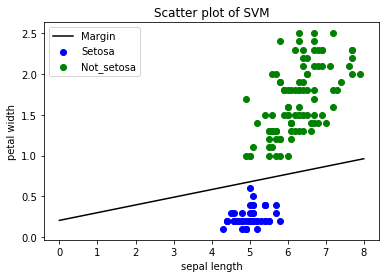

In [25]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0,8,100)
y = (-b - w1*x)/w2
ax.plot(x,y,linestyle = '-',color = 'black')
plt.scatter(X1_setosa,X2_setosa,color = 'blue')
plt.scatter(X1_not_setosa,X2_not_setosa,color = 'green')
plt.title('Scatter plot of SVM')
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.legend(['Margin','Setosa','Not_setosa'])

#  (iv) Sklearn Logistic Regression

In [26]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,solver='lbfgs').fit(Xtrain, Ytrain)
Y_hat = clf.predict(Xtest)
error = sum(abs(Y_hat - Ytest))
accuracy = (len(Xtest)-error)/len(Xtest)
print('The accuracy of sklearn is ',accuracy)

The accuracy of sklearn is  1.0
